In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
data_main = pd.read_csv('IMDB Dataset.csv', sep=',')
data_pos = data_main[data_main['sentiment'] == 'positive']
data_neg = data_main[data_main['sentiment'] == 'negative']
data_pos_select = data_pos.sample(n = 5000, random_state = 0)
data_neg_select = data_neg.sample(n = 5000, random_state = 0)
data = df_row = pd.concat([data_pos_select, data_neg_select])
data

,review,sentiment
28258,"No, it's not Citizen Kane. But would you expec...",positive
18107,"Robot Jox tries hard, but is fundamentally a s...",positive
44662,Ever since I've been allowed to play Goldeneye...,positive
24385,I wish I could laugh again as much as when I s...,positive
9723,House of Games is a wonderful movie at multipl...,positive
...,...,...
8062,"I'd never heard of zero budget ""auteur"" Neil J...",negative
35181,"End of Days, starts off pretty well, Arnie pla...",negative
9494,"I dont know about you, but I've always felt dr...",negative
18580,"Strikes me as routine, as far as TV movies go....",negative


## Cleaning the text

In [3]:
# Figuring out stop words, words that are not useful and are common in all the text documents
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stop_words = stopwords.words('english')
stop_words += list(string.punctuation)
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [4]:
def cleaning_text(s):
    text_string = re.sub(r'[^a-zA-Z\s]', '', s, re.I|re.A).strip()
    token_string = word_tokenize(text_string)
    ps = PorterStemmer()
    token_string_stem = [ps.stem(w) for w in token_string if w not in stop_words]
    return ' '.join(token_string_stem)

In [5]:
import time
start_time = time.time()
data['review'] = data['review'].apply(cleaning_text)
end_time = time.time()
print('Time Taken = ', end_time-start_time, 'seconds')

Time Taken =  79.85801124572754 seconds


In [6]:
data['sentiment'] = data['sentiment'].apply(lambda s: int(s == 'positive'))
data

,review,sentiment
28258,No citizen kane but would expect name like mea...,1
18107,robot jox tri hard fundament seri fight scene ...,1
44662,ever sinc ive allow play goldeney imposs get m...,1
24385,I wish I could laugh much I saw show first tim...,1
9723,hous game wonder movi multipl level It fine my...,1
...,...,...
8062,Id never heard zero budget auteur neil johnson...,0
35181,end day start pretti well arni play cop simila...,0
9494,I dont know ive alway felt drawn art cinema th...,0
18580,strike routin far TV movi go I believ base tru...,0


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [8]:
train, test = train_test_split(data, test_size=0.2, random_state = 0)
train

,review,sentiment
18522,I came across film accid wish I hadntbr br whi...,0
25570,stori goodfornoth poet sidekick singer put wor...,0
9360,anoth handheld horror mean anoth divis movi fa...,1
12001,what wast time ive tri sit ski captain time ev...,0
19002,wow uhmwellwow I guess ill start plot A betrot...,1
...,...,...
35032,each year compani call Nu produc coupl action ...,0
1211,one time favourit film ever just beauti full h...,1
42091,man oh man ive foolishli procrastin right term...,1
17579,with nbc thank god your here network may tri r...,0


In [9]:
test

,review,sentiment
2998,della myer kim basing upperclass housewif live...,0
25274,the simpl hand camera give almost documentari ...,1
23946,with cast like I knew act would amaz still I c...,1
29489,thi good movi too preachi part stori line sub ...,0
22252,thi film mind weakest film origin star war tri...,1
...,...,...
30989,I first saw video year ago I thought excel I s...,1
49607,michael bowen play innocentish young man hitch...,1
41285,I watch three mad max film success first time ...,0
21791,michael sheen shine like afternoon sun brillia...,1


In [10]:
cv = CountVectorizer(max_features = 2500)

In [11]:
train_mat = cv.fit_transform(train['review'].values)

In [12]:
test_mat = cv.transform(test['review'].values)

In [13]:
cv.get_feature_names()

['abandon',
 'abil',
 'abl',
 'about',
 'absolut',
 'absurd',
 'abus',
 'academi',
 'accent',
 'accept',
 'accid',
 'accident',
 'accompani',
 'accomplish',
 'accord',
 'account',
 'accur',
 'accus',
 'achiev',
 'across',
 'act',
 'action',
 'activ',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adapt',
 'add',
 'addict',
 'addit',
 'address',
 'admir',
 'admit',
 'adopt',
 'ador',
 'adult',
 'advanc',
 'adventur',
 'advertis',
 'advic',
 'advis',
 'affair',
 'affect',
 'afraid',
 'africa',
 'african',
 'after',
 'afternoon',
 'again',
 'age',
 'agent',
 'ago',
 'agre',
 'ahead',
 'aid',
 'aim',
 'aint',
 'air',
 'aka',
 'al',
 'ala',
 'alan',
 'albert',
 'alcohol',
 'alex',
 'alic',
 'alien',
 'aliv',
 'all',
 'allbr',
 'allen',
 'allow',
 'almost',
 'alon',
 'along',
 'alreadi',
 'alright',
 'also',
 'altern',
 'although',
 'alway',
 'amateur',
 'amateurish',
 'amaz',
 'amazingli',
 'ambigu',
 'america',
 'american',
 'among',
 'amongst',
 'amount',
 'amus',
 'an',
 'ancient',
 

## Training and Testing the data

### Weighted Sums

In [14]:
def ww_fit(train):
    word_sentiment = {}
    for index, row in train.iterrows():
        line ,sentiment = row['review'],row['sentiment']
        for word in line.split():
            try: # Increment weight of the word by 1 if positive, decrement weight by 1 if negative
                word_sentiment[word][0] = word_sentiment[word][0] + 1 if int(sentiment) == 1 else word_sentiment[word][0] - 1
            except: # If word doesn't exist, create new entry in dictionary
                word_sentiment[word] = [1, 0] if int(sentiment) == 1 else [-1, 0]
            finally: # Increment number of occurences of the word; used later to compute the weighted sum instead of just sum
                word_sentiment[word][1] += 1
    word_weighted_sentiment = {word: word_sentiment[word][0] / word_sentiment[word][1] for word in word_sentiment.keys()}
    # Weighted sum of the sentiment of each word (divide weight of the word by number of occurences of the word)
    return word_weighted_sentiment

In [15]:
def ww_predict(test, word_weighted_sentiment):
    ww_y_pred = []
    for data in test['review'].values:
        words = data.split()
        sentiment = 0
        for word in words:
            try:
                sentiment += word_weighted_sentiment[word] # Compute sum of weighted sentiments of the words in the review
            except:
                sentiment += 0 # MISSING WORDS (words in testing data but not training data) ARE GIVEN SENTIMENT OF 0
        if sentiment >= 0:
            ww_y_pred.append(1)
        else:
            ww_y_pred.append(0)
    return np.array(ww_y_pred)

In [16]:
ww_dict = ww_fit(train)

In [17]:
ww_y_pred = ww_predict(test,ww_dict)

In [18]:
print('Confusion Matrix :')
print(metrics.confusion_matrix(test['sentiment'].values, ww_y_pred, labels = [0, 1]))

Confusion Matrix :
[[743 269]
 [111 877]]


In [19]:
ww_accuracy = metrics.accuracy_score(test['sentiment'].values, ww_y_pred)
print('Accuracy Score',ww_accuracy)

Accuracy Score 0.81


In [20]:
ww_precision, ww_recall, ww_f, ww_support= metrics.precision_recall_fscore_support(test['sentiment'].values, ww_y_pred, average = 'binary',labels = [0, 1])
print('Precision', ww_precision)
print('Recall', ww_recall)
print('F Score', ww_f)

Precision 0.7652705061082025
Recall 0.8876518218623481
F Score 0.8219306466729147


### 'Multinomial' Naive Bayes

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
NBClassifer = MultinomialNB()

In [23]:
NBClassifer.fit(train_mat, train['sentiment'].values)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
NB_y_pred = NBClassifer.predict(test_mat)

In [25]:
print('Confusion Matrix :')
print(metrics.confusion_matrix(test['sentiment'].values, NB_y_pred, labels = [0, 1]))

Confusion Matrix :
[[850 162]
 [174 814]]


In [26]:
NB_accuracy = metrics.accuracy_score(test['sentiment'].values, NB_y_pred)
print('Accuracy Score',NB_accuracy)

Accuracy Score 0.832


In [27]:
NB_precision, NB_recall, NB_f, NB_support= metrics.precision_recall_fscore_support(test['sentiment'].values, NB_y_pred, average = 'binary',labels = [0, 1])
print('Precision', NB_precision)
print('Recall', NB_recall)
print('F Score', NB_f)

Precision 0.8340163934426229
Recall 0.8238866396761133
F Score 0.8289205702647656


### Support Vector Machine (SVM)

In [28]:
from sklearn.svm import SVC

In [29]:
SVClassifer = SVC(gamma = 'scale')

In [30]:
SVClassifer.fit(train_mat, train['sentiment'].values)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
SVC_y_pred = SVClassifer.predict(test_mat)

In [32]:
print('Confusion Matrix :')
print(metrics.confusion_matrix(test['sentiment'].values, SVC_y_pred, labels = [0, 1]))

Confusion Matrix :
[[812 200]
 [134 854]]


In [33]:
SVC_accuracy = metrics.accuracy_score(test['sentiment'].values, SVC_y_pred)
print('Accuracy Score',SVC_accuracy)

Accuracy Score 0.833


In [34]:
SVC_precision, SVC_recall, SVC_f, SVC_support= metrics.precision_recall_fscore_support(test['sentiment'].values, SVC_y_pred, average = 'binary',labels = [0, 1])
print('Precision', SVC_precision)
print('Recall', SVC_recall)
print('F Score', SVC_f)

Precision 0.8102466793168881
Recall 0.8643724696356275
F Score 0.8364348677766896


### K-Nearest Neighbour

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
KNNClassifier = KNeighborsClassifier()

In [37]:
KNNClassifier.fit(train_mat, train['sentiment'].values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
KNN_y_pred = KNNClassifier.predict(test_mat)

In [39]:
print('Confusion Matrix :')
print(metrics.confusion_matrix(test['sentiment'].values, KNN_y_pred, labels = [0, 1]))

Confusion Matrix :
[[564 448]
 [293 695]]


In [40]:
KNN_accuracy = metrics.accuracy_score(test['sentiment'].values, KNN_y_pred)
print('Accuracy Score',KNN_accuracy)

Accuracy Score 0.6295


In [41]:
KNN_precision, KNN_recall, KNN_f, KNN_support= metrics.precision_recall_fscore_support(test['sentiment'].values, KNN_y_pred, average = 'binary',labels = [0, 1])
print('Precision', KNN_precision)
print('Recall', KNN_recall)
print('F Score', KNN_f)

Precision 0.6080489938757655
Recall 0.7034412955465587
F Score 0.652275926794932


### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
LogClassifier = LogisticRegression(solver = 'liblinear')

In [44]:
LogClassifier.fit(train_mat, train['sentiment'].values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
Log_y_pred = LogClassifier.predict(test_mat)

In [46]:
print('Confusion Matrix :')
print(metrics.confusion_matrix(test['sentiment'].values, Log_y_pred, labels = [0, 1]))

Confusion Matrix :
[[839 173]
 [165 823]]


In [47]:
Log_accuracy = metrics.accuracy_score(test['sentiment'].values, Log_y_pred)
print('Accuracy Score',Log_accuracy)

Accuracy Score 0.831


In [48]:
Log_precision, Log_recall, Log_f, Log_support= metrics.precision_recall_fscore_support(test['sentiment'].values, Log_y_pred, average = 'binary', labels = [0, 1])
print('Precision', Log_precision)
print('Recall', Log_recall)
print('F Score', Log_f)

Precision 0.8263052208835341
Recall 0.832995951417004
F Score 0.8296370967741936


## Graph to compare

In [49]:
import matplotlib.pyplot as plt

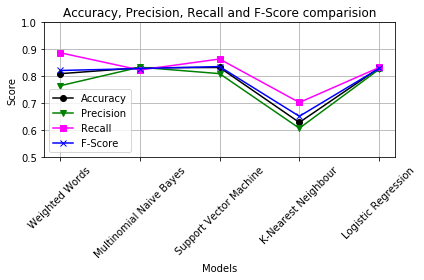

In [50]:
models = np.array(['Weighted Words', 'Multinomial Naive Bayes', 'Support Vector Machine', 'K-Nearest Neighbour', 'Logistic Regression'])
plt.plot(models, [ww_accuracy,NB_accuracy,SVC_accuracy,KNN_accuracy,Log_accuracy], 
        color = 'k',marker='o',label = 'Accuracy')
plt.plot(models, [ww_precision,NB_precision,SVC_precision,KNN_precision,Log_precision], 
        color = 'green',marker='v',label = 'Precision')
plt.plot(models, [ww_recall,NB_recall,SVC_recall,KNN_recall,Log_recall], 
        color = 'magenta',marker='s',label = 'Recall')
plt.plot(models, [ww_f,NB_f,SVC_f,KNN_f,Log_f], 
        color = 'blue',marker='x',label = 'F-Score')
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Accuracy, Precision, Recall and F-Score comparision")
plt.legend()
plt.grid()
plt.xticks(rotation = 45)
plt.ylim(0.5, 1)
plt.tight_layout()
plt.savefig('destination_path.svg', format='svg', dpi = 300)
plt.show()